# An example using Feature weighted ECM clustering


In [40]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns



In [41]:
def get_ensembles(table):
    result = []
    for row in table:
        row_str = 'Cl_' + '_'.join([str(i + 1) if elem == 1 else str(int(elem)) for i, elem in enumerate(row) if elem != 0])
        result.append(row_str)

    result[0] = 'Cl_atypique'
    result[-1] = 'Cl_incertains'

    cleaned_result = [''.join(ch for i, ch in enumerate(row_str) if ch != '_' or (i > 0 and row_str[i-1] != '_')) for row_str in result]

    return cleaned_result

def ev_plot_2D(data, x, normalize=False, splite=False, cex=8, cex_protos=5):
    mas = pd.DataFrame(x["mass"])
    c = len(np.unique(x['y_pl']))
    cols = get_ensembles(x['F'])
    mas.columns = cols
    mas["Cluster"] = mas.apply(lambda row: row.idxmax(), axis=1)

    # pca = PCA(n_components=2)
    # pca_result = pca.fit_transform(data)

    # variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

    ind_coord = pd.DataFrame(data, columns=["Dim.1", "Dim.2"])
    ind_coord["Cluster"] = pd.Categorical(mas["Cluster"])
    mean_coords = ind_coord.groupby('Cluster').mean()

    pcolor = sns.color_palette("Dark2", n_colors=len(ind_coord["Cluster"].unique()))
    plt.figure(figsize=(8, 6))

    if splite:
        sns.relplot(data=ind_coord, x="Dim.1", y="Dim.2", hue="Cluster", col="Cluster",
                    style="Cluster", palette=pcolor, s=cex, col_wrap=int((c ** 2) / 2))
    else:
        sns.scatterplot(data=ind_coord, x="Dim.1", y="Dim.2", hue="Cluster", palette=pcolor,
                        style="Cluster", s=cex)
        sns.scatterplot(data=mean_coords, x="Dim.1", y="Dim.2", s=(cex + 25), hue="Cluster",
                        palette=pcolor, style="Cluster", legend=False)

    sns.despine()
    legend = plt.legend(title="Cluster", loc='upper left', markerscale=0.3)
    plt.setp(legend.get_title(), fontsize=7)
    plt.setp(legend.get_texts(), fontsize=7)
    plt.tick_params(axis='both', labelsize=7)
    plt.axis('equal')
    plt.show()

In [17]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")

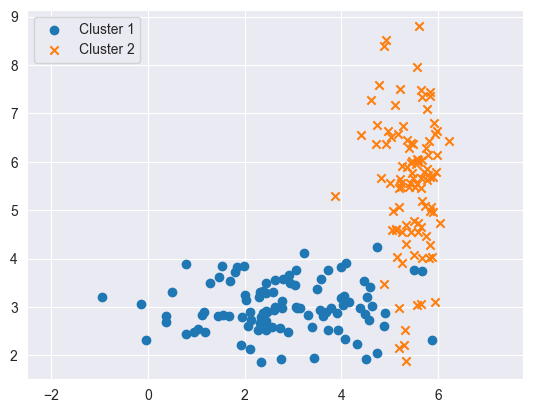

In [18]:
## Generating data set
# Number of samples in the cluster
num_samples = 100

# Mean and covariance for the cluster
mean = [3, 3]
covariance1 = [[2, 0],
               [0, 0.2]]  # Wider along x-axis, narrower along y-axis
cluster1 = np.random.multivariate_normal(mean, covariance1, num_samples)
cluster1 = np.c_[cluster1, np.zeros((cluster1.shape[0], 1))]

mean = [5.5, 5.5]
covariance2 = [[0.2, 0],
               [0, 2]]  # Wider along y-axis, narrower along x-axis
cluster2 = np.random.multivariate_normal(mean, covariance2, num_samples)
cluster2 = np.c_[cluster2, np.ones((cluster2.shape[0], 1))]

dataset = np.vstack([cluster1, cluster2])
df = pd.DataFrame(data=dataset[:, :-1], columns=['X-axis', 'Y-axis'])
plt.scatter(cluster1[:, 0], cluster1[:, 1], marker='o', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], marker='x', label='Cluster 2')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('2D Dataset with two clusters - Wide x-Axis, Narrow y-Axis')
plt.legend()
plt.axis('equal')
plt.show()

In [44]:
# Traditional ECM clustering
model = ecm(x=df, c=2, beta=2, alpha=1, delta=100, ntrials=5)

[1, 237.56153773765692]
[2, 232.0884607729455]
[3, 231.36266475565634]
[4, 231.19684471276756]
[5, 231.14129113738323]
[6, 231.12058398756295]
[7, 231.1127070479001]
[8, 231.10970145990538]
[9, 231.10855478394163]
[10, 231.10811771780652]
[  0.         231.10811772 231.10811772]
[1, 237.56153773765692]
[2, 232.08846077294547]
[3, 231.3626647556563]
[4, 231.19684471276756]
[5, 231.14129113738326]
[6, 231.12058398756295]
[7, 231.1127070479001]
[8, 231.10970145990544]
[9, 231.10855478394163]
[10, 231.10811771780652]
[  1.         231.10811772 231.10811772]
[1, 237.56153773765692]
[2, 232.08846077294547]
[3, 231.3626647556563]
[4, 231.19684471276756]
[5, 231.14129113738326]
[6, 231.12058398756295]
[7, 231.1127070479001]
[8, 231.10970145990544]
[9, 231.10855478394163]
[10, 231.10811771780652]
[  2.         231.10811772 231.10811772]
[1, 237.56153773765692]
[2, 232.08846077294547]
[3, 231.3626647556563]
[4, 231.19684471276756]
[5, 231.14129113738326]
[6, 231.12058398756295]
[7, 231.112707047

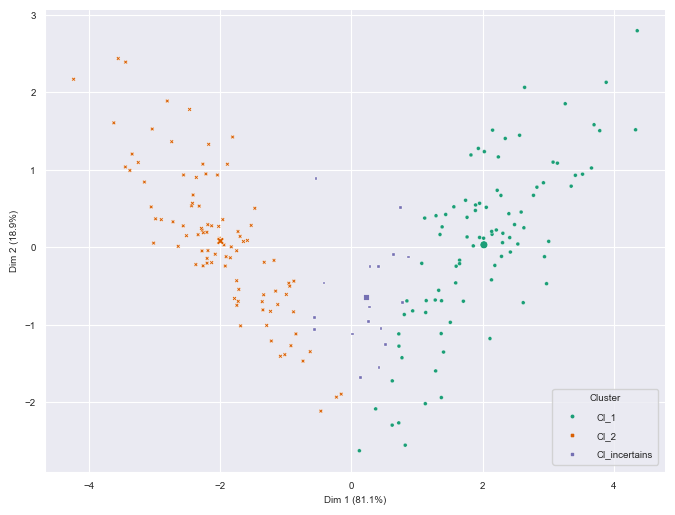

Adjusted Rand Index (ARI): 0.8456245542938297
Silhouette Index (SI): 0.5717648825599412
Maximum Non-specificity value: 2.6823721060035006
Minimum Non-specificity value: 0.0017485441322600574
Average Non-specificity value: 0.9028128163475663


In [46]:

# ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

true_labels = dataset[:, -1]
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Compute the Silhouette Index (SI)
si = silhouette_score(dataset[:, :-1], predicted_labels)
print(f"Silhouette Index (SI): {si}")

# Calculate Non-specificity
calculate_non_specificity(model)

# (Traditional ECM) Hard partition in 2-D without PCA

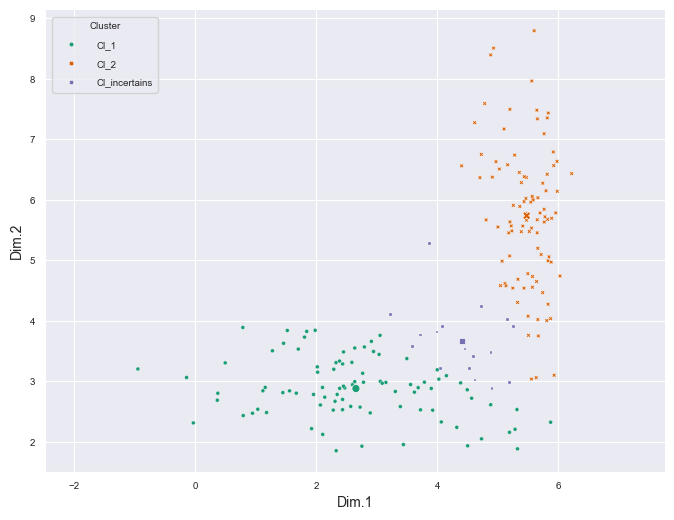

In [47]:
# Hard partition in 2-D without pCA
ev_plot_2D(data=dataset[:, :-1], x=model, normalize=False)

In [22]:
# Feature weighted ECM clustering
model = fwecm(x=df, c=2, beta=2, alpha=1, delta=100, ntrials=5)

[1, 44.563710939630575]
[2, 32.751166473456244]
[3, 29.832324898745792]
[4, 27.725461578817765]
[5, 26.19323333761398]
[6, 25.291619085546717]
[7, 24.93053641720376]
[8, 24.79743902933632]
[9, 24.736362234887434]
[10, 24.705349814257204]
[11, 24.687047363682023]
[12, 24.67558436972466]
[13, 24.668893944224]
[14, 24.663499839157158]
[15, 24.66087413828832]
[16, 24.657600865517857]
[17, 24.656506980116024]
[18, 24.655446693930298]
[19, 24.65444971934345]
[ 0.         24.65444972 24.65444972]
[1, 67.00288786099253]
[2, 41.04467458923562]
[3, 27.246696235957337]
[4, 25.323011081283816]
[5, 24.94421474700198]
[6, 24.808011145225883]
[7, 24.747925550328656]
[8, 24.716545711762535]
[9, 24.697426840887008]
[10, 24.685894143302264]
[11, 24.67794999545501]
[12, 24.67247029715993]
[13, 24.668731543269928]
[14, 24.6654369690328]
[15, 24.664284056076585]
[16, 24.6622352243645]
[17, 24.66125049477371]
[ 1.         24.66125049 24.65444972]
[1, 33.33225676266305]
[2, 28.30081733841488]
[3, 26.46420070

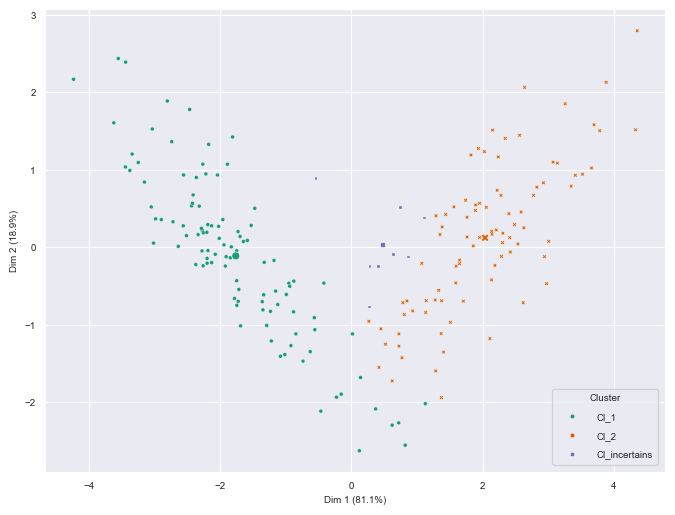

Adjusted Rand Index (ARI): 0.9020088130200377 - J value: 24.654155553980182
Silhouette Index (SI): 0.5523238617062932
Maximum Non-specificity value: 2.9165818551227125
Minimum Non-specificity value: 0.0027963704804011384
Average Non-specificity value: 0.6898628499167211


In [25]:

# ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1]
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Compute the Silhouette Index (SI)
si = silhouette_score(dataset[:, :-1], predicted_labels)
print(f"Silhouette Index (SI): {si}")

# Calculate Non-specificity
calculate_non_specificity(model)

# (Weighted ECM) Hard partition in 2-D without PCA

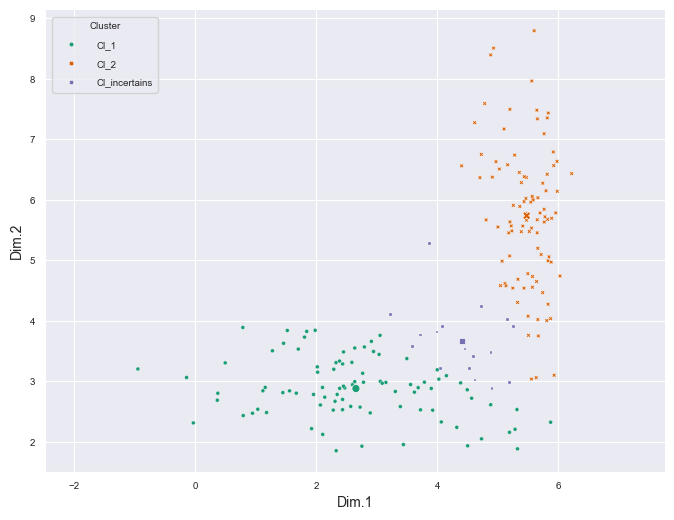

In [42]:
ev_plot_2D(data=dataset[:, :-1], x=model, normalize=False)